In [94]:
import functools
import requests
import pandas as pd
import numpy as npa
import networkx as nx
from matplotlib_venn import venn3

pd.options.display.max_colwidth = None

In [123]:

def rnacentral_api(id_):
    r = requests.get(f"https://rnacentral.org/api/v1/rna/{id_}/?format=json")
    return r.json()


def extract_ids(xrefs):
    ids = []
    for xref in xrefs["results"]:
        if xref["taxid"] == 9606:
            ids.append(xref["accession"]["id"])
    ids = process_ids(ids)
    return ids

def process_ids(ids):
    result = {}
    for id_ in ids:
        a = id_.split(":")
        try:
            if a[0].startswith("NR"):
                result["Refseq"] = a[0]
            elif a[0].startswith("ENST"):
                result["ENST"] = a[0]
            elif a[0].startswith("NO"):
                result["NONCODE"] = a[0]
            else:
                result[a[0]] = a[1]
            print(a)
        except:
            print("Failed:", a)
    return result

In [2]:
df = pd.read_csv("../../data/processed/finals/lcc_edges.tsv", sep="\t", usecols=["subject", "object", "predicate"])

In [3]:
g = nx.from_pandas_edgelist(df, source="subject", target="object", edge_attr="predicate", create_using=nx.MultiGraph, edge_key="predicate")

In [4]:
rna = [node for node in g.nodes if node.startswith("RNA")]

In [5]:
aa = nx.adamic_adar_index(nx.Graph(g), (("HP:0000717", r) for r in rna))

In [6]:
aa = sorted(aa, key=lambda x: x[-1], reverse=True)

In [7]:
jc = nx.jaccard_coefficient(nx.Graph(g), (("HP:0000717", r) for r in rna))

In [8]:
jc = sorted(jc, key=lambda x: x[-1], reverse=True)

In [9]:
pa = nx.preferential_attachment(nx.Graph(g), (("HP:0000717", r) for r in rna))

In [10]:
pa = sorted(pa, key=lambda x: x[-1], reverse=True)

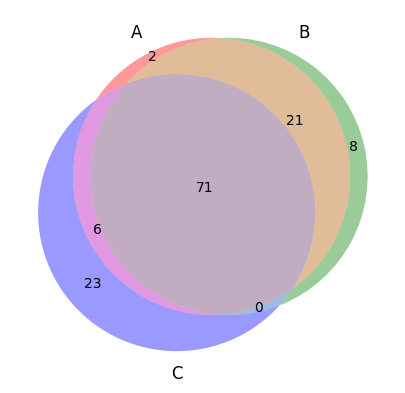

In [14]:
venn3([set([a[1] for a in aa[:100]]), set([j[1] for j in jc[:100]]), set([p[1] for p in pa[:100]])])

In [15]:
def borda_sort(lists):
    scores = {}
    for l in lists:
        for idx, elem in enumerate(reversed(l)):
            if not elem in scores:
                scores[elem] = 0
            scores[elem] += idx
    return sorted(scores.keys(), key=lambda elem: scores[elem], reverse=True)

In [16]:
ranked = borda_sort([[a[1] for a in aa[:100]], [j[1] for j in jc[:100]], [p[1] for p in pa[:100]]])

In [17]:
ranked[:100]

['RNACENTRAL:URS0000237AF9',
 'RNACENTRAL:URS00004BCD9C',
 'RNACENTRAL:URS0000316FA5',
 'RNACENTRAL:URS000020BE6A',
 'RNACENTRAL:URS00003768C5',
 'RNACENTRAL:URS00002075FA',
 'RNACENTRAL:URS0000204428',
 'RNACENTRAL:URS0000338542',
 'RNACENTRAL:URS0000324096',
 'RNACENTRAL:URS0000149452',
 'RNACENTRAL:URS00004449AE',
 'RNACENTRAL:URS000020D84A',
 'RNACENTRAL:URS000030BD69',
 'RNACENTRAL:URS00003D5391',
 'RNACENTRAL:URS0000574A2C',
 'RNACENTRAL:URS00001DC04F',
 'RNACENTRAL:URS00004AD914',
 'RNACENTRAL:URS0000597BED',
 'RNACENTRAL:URS000013D17D',
 'RNACENTRAL:URS0000155642',
 'RNACENTRAL:URS00000AA464',
 'RNACENTRAL:URS000039ED8D',
 'RNACENTRAL:URS00002B3783',
 'RNACENTRAL:URS000006FDD4',
 'RNACENTRAL:URS00003D1AE3',
 'RNACENTRAL:URS0000416056',
 'RNACENTRAL:URS000042C6A6',
 'RNACENTRAL:URS0000298BA3',
 'RNACENTRAL:URS000043D1A9',
 'RNACENTRAL:URS00003CF1AD',
 'RNACENTRAL:URS00005B3525',
 'RNACENTRAL:URS000025576D',
 'RNACENTRAL:URS00003FE4D4',
 'RNACENTRAL:URS0000315B13',
 'RNACENTRAL:U

In [48]:
rnac = [rnacentral_api(r.split(":")[-1]) for r in ranked[:50]]

In [49]:
rnac = pd.DataFrame(rnac)

In [54]:
rnac["xrefs_"] = rnac["xrefs"].apply(lambda x: requests.get(x).json())

In [126]:
rnac["ids"] = rnac["xrefs_"].apply(extract_ids)

['GENECARDS', 'MIR335', 'URS0000237AF9_9606']
['MALACARDS', 'MIR335', 'URS0000237AF9_9606']
['LNCBASE', 'hsa-miR-335-5p']
['TARBASE', 'hsa-miR-335-5p']
['NR_029899.1', '16..38', 'ncRNA']
['INTACT', 'URS00004BCD9C_9606']
['GENECARDS', 'MIR16-1', 'URS00004BCD9C_9606']
['GENECARDS', 'MIR16-2', 'URS00004BCD9C_9606']
['MALACARDS', 'MIR16-1', 'URS00004BCD9C_9606']
['MALACARDS', 'MIR16-2', 'URS00004BCD9C_9606']
['INTACT', 'URS0000316FA5_9606']
['GENECARDS', 'MIR26B', 'URS0000316FA5_9606']
['MALACARDS', 'MIR26B', 'URS0000316FA5_9606']
['LNCBASE', 'hsa-miR-26b-5p']
['TARBASE', 'hsa-miR-26b-5p']
['INTACT', 'URS000020BE6A_9606']
['GENECARDS', 'MIR124-1', 'URS000020BE6A_9606']
['GENECARDS', 'MIR124-2', 'URS000020BE6A_9606']
['GENECARDS', 'MIR124-3', 'URS000020BE6A_9606']
['MALACARDS', 'MIR124-1', 'URS000020BE6A_9606']
['MALACARDS', 'MIR124-2', 'URS000020BE6A_9606']
['MALACARDS', 'MIR124-3', 'URS000020BE6A_9606']
['INTACT', 'URS00003768C5_9606']
['GENECARDS', 'MIR92A1', 'URS00003768C5_9606']
['GENE

In [125]:
rnac

url  rnacentral_id  \
0   http://rnacentral.org/api/v1/rna/URS0000237AF9?format=json  URS0000237AF9   
1   http://rnacentral.org/api/v1/rna/URS00004BCD9C?format=json  URS00004BCD9C   
2   http://rnacentral.org/api/v1/rna/URS0000316FA5?format=json  URS0000316FA5   
3   http://rnacentral.org/api/v1/rna/URS000020BE6A?format=json  URS000020BE6A   
4   http://rnacentral.org/api/v1/rna/URS00003768C5?format=json  URS00003768C5   
5   http://rnacentral.org/api/v1/rna/URS00002075FA?format=json  URS00002075FA   
6   http://rnacentral.org/api/v1/rna/URS0000204428?format=json  URS0000204428   
7   http://rnacentral.org/api/v1/rna/URS0000338542?format=json  URS0000338542   
8   http://rnacentral.org/api/v1/rna/URS0000324096?format=json  URS0000324096   
9   http://rnacentral.org/api/v1/rna/URS0000149452?format=json  URS0000149452   
10  http://rnacentral.org/api/v1/rna/URS00004449AE?format=json  URS00004449AE   
11  http://rnacentral.org/api/v1/rna/URS000020D84A?format=json  URS000020D84A   
12  http://rnacentral.org/api/v1/rna/URS000030BD69?format=json  URS000030BD69   
13  http://rnacentral.org/api/v1/rna/URS00003D5391?format=json  URS00003D5391   
14  http://rnacentral.org/api/v1/rna/URS0000574A2C?format=json  URS0000574A2C   
15  http://rnacentral.org/api/v1/rna/URS00001DC04F?format=json  URS00001DC04F   
16  http://rnacentral.org/api/v1/rna/URS00004AD914?format=json  URS00004AD914   
17  http://rnacentral.org/api/v1/rna/URS0000597BED?format=json  URS0000597BED   
18  http://rnacentral.org/api/v1/rna/URS000013D17D?format=json  URS000013D17D   
19  http://rnacentral.org/api/v1/rna/URS0000155642?format=json  URS0000155642   
20  http://rnacentral.org/api/v1/rna/URS00000AA464?format=json  URS00000AA464   
21  http://rnacentral.org/api/v1/rna/URS000039ED8D?format=json  URS000039ED8D   
22  http://rnacentral.org/api/v1/rna/URS00002B3783?format=json  URS00002B3783   
23  http://rnacentral.org/api/v1/rna/URS000006FDD4?format=json  URS000006FDD4   
24  http://rnacentral.org/api/v1/rna/URS00003D1AE3?format=json  URS00003D1AE3   
25  http://rnacentral.org/api/v1/rna/URS0000416056?format=json  URS0000416056   
26  http://rnacentral.org/api/v1/rna/URS000042C6A6?format=json  URS000042C6A6   
27  http://rnacentral.org/api/v1/rna/URS0000298BA3?format=json  URS0000298BA3   
28  http://rnacentral.org/api/v1/rna/URS000043D1A9?format=json  URS000043D1A9   
29  http://rnacentral.org/api/v1/rna/URS00003CF1AD?format=json  URS00003CF1AD   
30  http://rnacentral.org/api/v1/rna/URS00005B3525?format=json  URS00005B3525   
31  http://rnacentral.org/api/v1/rna/URS000025576D?format=json  URS000025576D   
32  http://rnacentral.org/api/v1/rna/URS00003FE4D4?format=json  URS00003FE4D4   
33  http://rnacentral.org/api/v1/rna/URS0000315B13?format=json  URS0000315B13   
34  http://rnacentral.org/api/v1/rna/URS000000B1C9?format=json  URS000000B1C9   
35  http://rnacentral.org/api/v1/rna/URS0000762AC3?format=json  URS0000762AC3   
36  http://rnacentral.org/api/v1/rna/URS000059273E?format=json  URS000059273E   
37  http://rnacentral.org/api/v1/rna/URS000040DCFF?format=json  URS000040DCFF   
38  http://rnacentral.org/api/v1/rna/URS000022A78C?format=json  URS000022A78C   
39  http://rnacentral.org/api/v1/rna/URS00004E1410?format=json  URS00004E1410   
40  http://rnacentral.org/api/v1/rna/URS0000591950?format=json  URS0000591950   
41  http://rnacentral.org/api/v1/rna/URS00004E0808?format=json  URS00004E0808   
42  http://rnacentral.org/api/v1/rna/URS0000070B1D?format=json  URS0000070B1D   
43  http://rnacentral.org/api/v1/rna/URS0000427B68?format=json  URS0000427B68   
44  http://rnacentral.org/api/v1/rna/URS00000ED600?format=json  URS00000ED600   
45  http://rnacentral.org/api/v1/rna/URS000050DE77?format=json  URS000050DE77   
46  http://rnacentral.org/api/v1/rna/URS00003DA300?format=json  URS00003DA300   
47  http://rnacentral.org/api/v1/rna/URS00002152A8?format=json  URS00002152A8   
48  http://rnacentral.org/api/v1/rna/URS000038B25B?format=json  URS000038B25B   
49  http:

In [115]:
(rnac[["rnacentral_id", "ids"]]
 .set_index("rnacentral_id")["ids"]
 .apply(pd.Series))

GENECARDS  MALACARDS          LNCBASE          TARBASE  \
rnacentral_id                                                           
URS0000237AF9     MIR335     MIR335   hsa-miR-335-5p   hsa-miR-335-5p   
URS00004BCD9C    MIR16-2    MIR16-2              NaN              NaN   
URS0000316FA5     MIR26B     MIR26B   hsa-miR-26b-5p   hsa-miR-26b-5p   
URS000020BE6A   MIR124-3   MIR124-3              NaN              NaN   
URS00003768C5    MIR92A2    MIR92A2              NaN              NaN   
URS00002075FA      MIR17      MIR17              NaN              NaN   
URS0000204428      NEAT1      NEAT1              NaN              NaN   
URS0000338542     MIR155     MIR155   hsa-miR-155-5p   hsa-miR-155-5p   
URS0000324096   MIRLET7B   MIRLET7B              NaN              NaN   
URS0000149452      MIR93      MIR93              NaN              NaN   
URS00004449AE    MIR106B    MIR106B  hsa-miR-106b-5p              NaN   
URS000020D84A   MIR218-2   MIR218-2              NaN              NaN   
URS000030BD69     MIR34A     MIR34A              NaN              NaN   
URS00003D5391     MIR615     MIR615   hsa-miR-615-3p   hsa-miR-615-3p   
URS0000574A2C     MIR20A     MIR20A              NaN              NaN   
URS00001DC04F     MIR1-2     MIR1-1              NaN              NaN   
URS00004AD914     MIR15B     MIR15B              NaN              NaN   
URS0000597BED     MIR484     MIR484      hsa-miR-484      hsa-miR-484   
URS000013D17D    MIR19B1    MIR19B1              NaN              NaN   
URS0000155642     MIR192     MIR192              NaN              NaN   
URS00000AA464    MIR193B    MIR193B  hsa-miR-193b-3p  hsa-miR-193b-3p   
URS000039ED8D      MIR21      MIR21    hsa-miR-21-5p    hsa-miR-21-5p   
URS00002B3783     MIR20B     MIR20B              NaN              NaN   
URS000006FDD4     MIR19A     MIR19A              NaN              NaN   
URS00003D1AE3     MIR15A     MIR15A              NaN              NaN   
URS0000416056  MIRLET7A3  MIRLET7A2              NaN              NaN   
URS000042C6A6     MIR149     MIR149   hsa-miR-149-3p   hsa-miR-149-3p   
URS0000298BA3    MIR519D    MIR519D              NaN  hsa-miR-519d-3p   
URS000043D1A9     MIR30A     MIR30A   hsa-miR-30a-5p   hsa-miR-30a-5p   
URS00003CF1AD    MIR320A    MIR320A              NaN              NaN   
URS00005B3525     MIR195     MIR195   hsa-miR-195-5p   hsa-miR-195-5p   
URS000025576D     MIR92B     MIR92B              NaN              NaN   
URS00003FE4D4    MIR106A    MIR106A              NaN              NaN   
URS0000315B13     MIR215     MIR215   hsa-miR-215-5p   hsa-miR-215-5p   
URS000000B1C9   MIRLET7E   MIRLET7E              NaN              NaN   
URS0000762AC3     MALAT1     MALAT1              NaN              NaN   
URS000059273E    MIR24-2    MIR24-2              NaN              NaN   
URS000040DCFF     MIR186     MIR186   hsa-miR-186-5p   hsa-miR-186-5p   
URS000022A78C     MIR455     MIR455   hsa-miR-455-3p   hsa-miR-455-3p   
URS00004E1410   MIR129-2   MIR129-1              NaN              NaN   
URS0000591950     MIR7-3     MIR7-3              NaN              NaN   
URS00004E0808      MIR98      MIR98              NaN              NaN   
URS0000070B1D     MIR877     MIR877   hsa-miR-877-3p   hsa-miR-877-3p   
URS0000427B68    MIR1277        NaN  hsa-miR-1277-5p  hsa-miR-1277-5p   
URS00000ED600     MIR375     MIR375              NaN              NaN   
URS000050DE77   MIRLET7C   MIRLET7C              NaN              NaN   
URS00003DA300   MIR181A1   MIR181A1              NaN              NaN   
URS00002152A8     MIR30B     MIR30B   hsa-miR-30b-3p   hsa-miR-30b-3p   
URS000038B25B    MIR526B    MIR526B  hsa-miR-526b-3p  hsa-miR-526b-3p   
URS00002ED61F     MIR744     MIR744              NaN              NaN   

              NR_029899.1              INTACT  EXPRESSIONATLAS  \
rnacentral_id                                                    
URS0000237AF9      16..38                 NaN              NaN   
URS00004BCD9C       

In [75]:
[i for i in xrefs_["results"] if i["taxid"] == 9606]

[{'database': 'GeneCards',
  'is_active': True,
  'first_seen': '2019-12-06 00:00:00',
  'last_seen': '2023-01-24 00:00:00',
  'taxid': 9606,
  'accession': {'url': 'http://rnacentral.org/api/v1/accession/GENECARDS:MIR335:URS0000237AF9_9606/info?format=json',
   'id': 'GENECARDS:MIR335:URS0000237AF9_9606',
   'parent_ac': '',
   'seq_version': 1,
   'feature_start': 1,
   'feature_end': 24,
   'feature_name': 'ncRNA',
   'description': 'Homo sapiens (human) hsa-miR-335-5p',
   'external_id': 'GENECARDS:MIR335:URS0000237AF9_9606',
   'optional_id': '',
   'locus_tag': '',
   'species': 'Homo sapiens',
   'inference': '',
   'rna_type': 'miRNA',
   'gene': 'MIR335',
   'product': '',
   'organelle': '',
   'citations': 'http://rnacentral.org/api/v1/accession/GENECARDS:MIR335:URS0000237AF9_9606/citations?format=json',
   'expert_db_url': 'https://www.genecards.org/cgi-bin/carddisp.pl?gene=MIR335',
   'standard_name': '',
   'pdb_entity_id': None,
   'pdb_structured_note': None,
   'hgnc_e

In [66]:
xrefs_

{'count': 35,
 'next': 'http://rnacentral.org/api/v1/rna/URS0000237AF9/xrefs?format=json&page=2',
 'previous': None,
 'results': [{'database': 'piRBase',
   'is_active': True,
   'first_seen': '2020-12-17 00:00:00',
   'last_seen': '2021-01-02 00:00:00',
   'taxid': 10090,
   'accession': {'url': 'http://rnacentral.org/api/v1/accession/piRBase:piR-mmu-8212056/info?format=json',
    'id': 'piRBase:piR-mmu-8212056',
    'parent_ac': '',
    'seq_version': 2,
    'feature_start': 30741314,
    'feature_end': 30741336,
    'feature_name': 'ncRNA',
    'description': 'Mus musculus (house mouse) Mus_musculus piRNA piR-mmu-8212056',
    'external_id': 'piR-mmu-8212056',
    'optional_id': '',
    'locus_tag': '',
    'species': 'Mus musculus',
    'inference': '',
    'rna_type': 'rasiRNA',
    'gene': '',
    'product': '',
    'organelle': '',
    'citations': 'http://rnacentral.org/api/v1/accession/piRBase:piR-mmu-8212056/citations?format=json',
    'expert_db_url': 'http://bigdata.ibp.ac.

In [85]:
xref = xrefs_["results"][1]

In [86]:
xref

{'database': 'GeneCards',
 'is_active': True,
 'first_seen': '2019-12-06 00:00:00',
 'last_seen': '2023-01-24 00:00:00',
 'taxid': 9606,
 'accession': {'url': 'http://rnacentral.org/api/v1/accession/GENECARDS:MIR335:URS0000237AF9_9606/info?format=json',
  'id': 'GENECARDS:MIR335:URS0000237AF9_9606',
  'parent_ac': '',
  'seq_version': 1,
  'feature_start': 1,
  'feature_end': 24,
  'feature_name': 'ncRNA',
  'description': 'Homo sapiens (human) hsa-miR-335-5p',
  'external_id': 'GENECARDS:MIR335:URS0000237AF9_9606',
  'optional_id': '',
  'locus_tag': '',
  'species': 'Homo sapiens',
  'inference': '',
  'rna_type': 'miRNA',
  'gene': 'MIR335',
  'product': '',
  'organelle': '',
  'citations': 'http://rnacentral.org/api/v1/accession/GENECARDS:MIR335:URS0000237AF9_9606/citations?format=json',
  'expert_db_url': 'https://www.genecards.org/cgi-bin/carddisp.pl?gene=MIR335',
  'standard_name': '',
  'pdb_entity_id': None,
  'pdb_structured_note': None,
  'hgnc_enembl_id': None,
  'hgnc_id'